In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler

In [ ]:
googleplaystore = pd.read_csv('/content/drive/MyDrive/googleplaystore.csv')

In [ ]:
googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#Data Cleaning or Refinement

###Deal with Missing Values:

Identify columns with missing values using isnull() or info().
Decide how to handle them: either by filling in with appropriate values (mean, median, mode) or by removing rows/columns with missing data.

In [ ]:

# Checking for missing values
missing_values = googleplaystore.isnull().sum()
print(missing_values)


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [ ]:

# Example: Filling missing ratings with the median
googleplaystore['Rating'].fillna(googleplaystore['Rating'].median(), inplace=True)


In [ ]:
# converting Installs column to numeric value

def clean_installs(installs):
    # Remove '+' and ',' characters
    installs = installs.replace('+', '').replace(',', '')

    # Convert to float if the cleaned string is numeric, otherwise return 0
    return float(installs) if installs.isdigit() else 0

# Apply the function to the 'Installs' column
googleplaystore['Installs'] = googleplaystore['Installs'].apply(clean_installs)

googleplaystore['Installs']

,Installs
0,10000.0
1,500000.0
2,5000000.0
3,50000000.0
4,100000.0
...,...
10836,5000.0
10837,100.0
10838,1000.0
10839,1000.0


In [ ]:
# converting Installs column to numeric value

def clean_size(x):
    if 'M' in x:
        return float(x.replace('M', ''))  # Convert MB to float
    elif 'k' in x:
        return float(x.replace('k', '')) / 1024  # Convert KB to MB
    else:
        return np.nan  # Convert non-numeric text to NaN

googleplaystore['Size'] = googleplaystore['Size'].apply(clean_size)
googleplaystore['Size']

,Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8
...,...
10836,53.0
10837,3.6
10838,9.5
10839,NaN


In [ ]:
# filling missing values in size
googleplaystore['Size'].fillna(googleplaystore['Size'].median(), inplace=True)
googleplaystore['Size'].isnull().sum()

0

###Eliminate Extra Variables:

Remove columns that are not useful for your analysis. For instance, columns like Last Updated, Current Ver, and Android Ver might not be relevant depending on your analysis goals.

In [ ]:
# Dropping unnecessary columns
googleplaystore.drop(['Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

###Eliminate Duplicates:

Remove duplicate rows to ensure that each entry is unique.


In [ ]:
# Removing duplicate rows
googleplaystore.drop_duplicates(inplace=True)

###Detect and Remove Outliers:

Use box plots to identify outliers in numerical columns like Rating and Reviews.
Remove or handle these outliers based on your analysis needs.


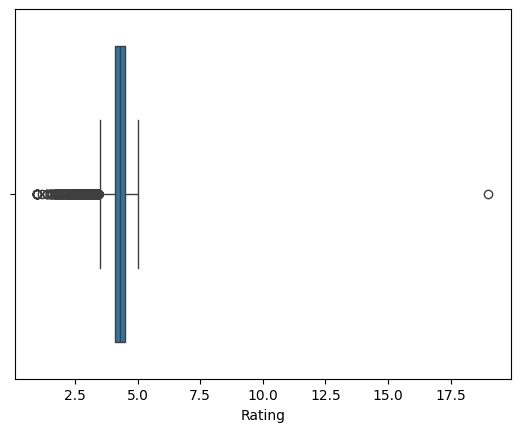

In [ ]:
# Box plot to detect outliers in 'Rating'
sns.boxplot(x=googleplaystore['Rating'])
plt.show()

In [ ]:

# Removing outliers using IQR method
Q1 = googleplaystore['Rating'].quantile(0.25)
Q3 = googleplaystore['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
googleplaystore = googleplaystore[(googleplaystore['Rating'] >= lower_bound) & (googleplaystore['Rating'] <= upper_bound)]

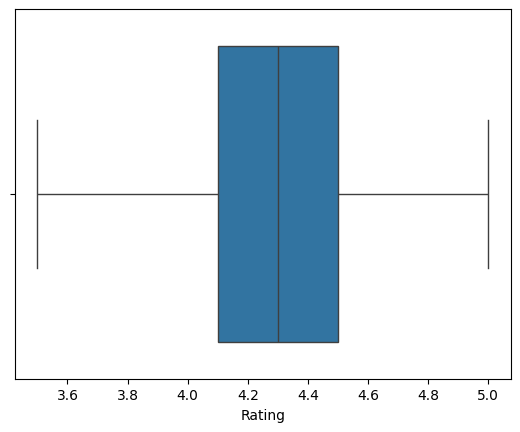

In [ ]:
sns.boxplot(x=googleplaystore['Rating'])
plt.show()


###Scaling and Normalization:

Apply scaling or normalization to numerical features to standardize the data.

In [ ]:
# Normalizing the 'Size' and 'Reviews' columns
scaler = MinMaxScaler()
googleplaystore[['Size', 'Reviews']] = scaler.fit_transform(googleplaystore[['Size', 'Reviews']])

###Eliminate Blank Spaces or Missing Information:

Use the SimpleImputer to handle any remaining missing values or blank spaces.

In [ ]:
# Impute missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer and transform the 'Type' column
googleplaystore['Type'] = imputer.fit_transform(googleplaystore[['Type']]).ravel()

googleplaystore['Type']

,Type
0,Free
1,Free
2,Free
3,Free
4,Free
...,...
10836,Free
10837,Free
10838,Free
10839,Free



###Arrange the Data Logically and Sequentially:

Ensure that the data is logically ordered, which can involve sorting by columns like Category or Rating.


In [ ]:

# Sorting the data by 'Category' and 'Rating'
googleplaystore.sort_values(by=['Category', 'Rating'], ascending=[True, False], inplace=True)

###Group Data for Better Visualization:

Group data based on categorical columns like Category or Content Rating to make analysis and visualization easier.

In [ ]:
# Grouping by 'Category' and calculating the mean of 'Rating'
# Selecting only the numeric columns
numeric_columns = googleplaystore.select_dtypes(include=['float64', 'int64'])

# Grouping by 'Category' and calculating the mean of only numeric columns
grouped_data = googleplaystore.groupby('Category')[numeric_columns.columns].mean()

print(grouped_data)

                       Rating   Reviews      Size      Installs
Category                                                       
ART_AND_DESIGN       4.388889  0.000348  0.126499  1.971954e+06
AUTO_AND_VEHICLES    4.307595  0.000188  0.202245  6.711660e+05
BEAUTY               4.305769  0.000097  0.137121  5.228279e+05
BOOKS_AND_REFERENCE  4.390868  0.001277  0.127019  8.741240e+06
BUSINESS             4.314545  0.000409  0.141746  2.225009e+06
COMICS               4.331373  0.000817  0.140326  9.679618e+05
COMMUNICATION        4.242939  0.022170  0.120097  6.959884e+07
DATING               4.194767  0.000407  0.158478  1.156709e+06
EDUCATION            4.375385  0.002280  0.182190  4.107323e+06
ENTERTAINMENT        4.170093  0.005672  0.189353  2.276271e+07
EVENTS               4.419048  0.000033  0.138647  2.535343e+05
FAMILY               4.294983  0.002792  0.275491  5.503562e+06
FINANCE              4.300917  0.000649  0.172778  2.318164e+06
FOOD_AND_DRINK       4.292982  0.000846 

## data after cleaning

In [ ]:

googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1.279455e-08,0.028919,100.0,Free,0,Everyone,Art & Design
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8,2.456553e-06,0.059922,10000.0,Free,0,Everyone,Art & Design
3982,Cardi B Wallpaper,ART_AND_DESIGN,4.8,3.237020e-06,0.036920,50000.0,Free,0,Everyone,Art & Design
4759,X Launcher Pro - IOS Style Theme & Control Center,ART_AND_DESIGN,4.8,1.555817e-05,0.085924,10000.0,Paid,$1.99,Everyone,Art & Design
5254,AJ Styles HD Wallpapers,ART_AND_DESIGN,4.8,6.141382e-07,0.249938,5000.0,Free,0,Everyone,Art & Design


In [ ]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9632 entries, 8888 to 10019
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9632 non-null   object 
 1   Category        9632 non-null   object 
 2   Rating          9632 non-null   float64
 3   Reviews         9632 non-null   float64
 4   Size            9632 non-null   float64
 5   Installs        9632 non-null   float64
 6   Type            9632 non-null   object 
 7   Price           9632 non-null   object 
 8   Content Rating  9632 non-null   object 
 9   Genres          9632 non-null   object 
dtypes: float64(4), object(6)
memory usage: 827.8+ KB


In [ ]:
googleplaystore.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
googleplaystore.value_counts()

,,,,,,,,,,count
App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,
"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.3,3.454527e-07,0.035920,500.0,Free,0,Everyone,Sports,1
NCAA March Madness Live,SPORTS,4.1,4.365883e-04,0.189933,5000000.0,Free,0,Everyone,Sports,1
NCLEX Multi-topic Nursing Exam Review-Quiz & notes,MEDICAL,5.0,1.279455e-08,0.041920,10.0,Free,0,Everyone,Medical,1
NCLEX-RN Q&A FLASH CARDS - FA Davis,MEDICAL,4.3,2.558909e-08,0.075923,1000.0,Free,0,Everyone,Medical,1
NDS Emulator - For Android 6,GAME,4.1,1.791492e-04,0.189933,1000000.0,Free,0,Everyone,Arcade,1
...,...,...,...,...,...,...,...,...,...,...
Doctor Games For Girls - Hospital ER,FAMILY,4.5,6.525218e-07,0.389949,5000.0,Free,0,Everyone,Casual,1
Doctor Kids,FAMILY,4.2,2.564667e-03,0.249938,10000000.0,Free,0,Everyone,Casual;Pretend Play,1
Doctor On Demand,MEDICAL,4.7,2.389253e-04,0.129928,1000000.0,Free,0,Everyone,Medical,1


#Part 4: Exploratory Data Analysis (EDA)
Perform EDA to understand the relationships and patterns in the data.

we can use correlation matrices, pair plots, and summary statistics.


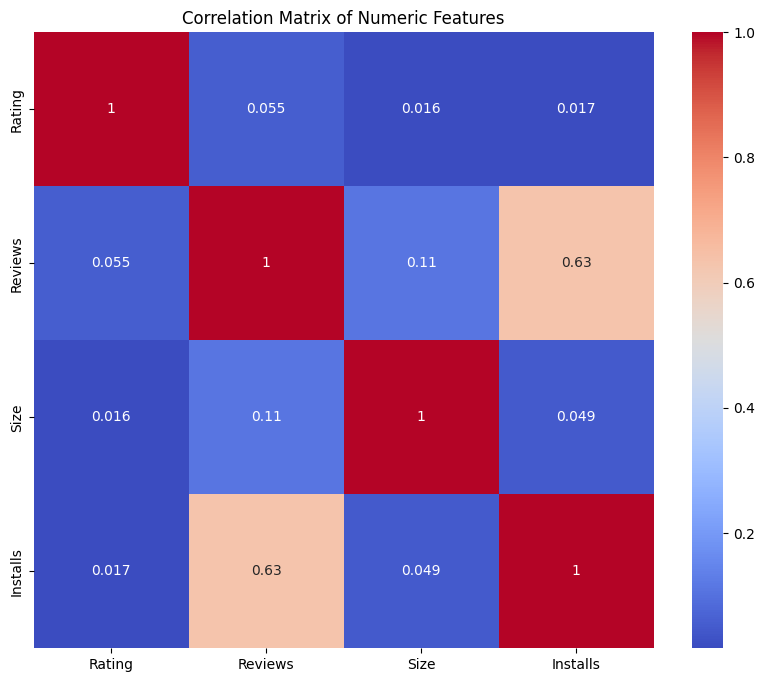

In [ ]:
numeric_columns = googleplaystore.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


#Part 5: Visualization
###Create various plots to visualize the data:

Line Plot: Show trends over time or any continuous variable.
Area Plot: Compare multiple quantities over time.
Histogram: Display the distribution of numerical data.
Bar Chart: Compare different categories.
Pie Chart: Show the proportion of categories.
Box Plot: Visualize the distribution and detect outliers.
Scatter Plot: Analyze relationships between two numerical variables.
Bubble Plot: An enhanced scatter plot that includes a third dimension.

###1. Line Plot
A line plot can be used to show trends over time. However, since the dataset does not have a time series column, we'll create a line plot showing the average rating for each category.


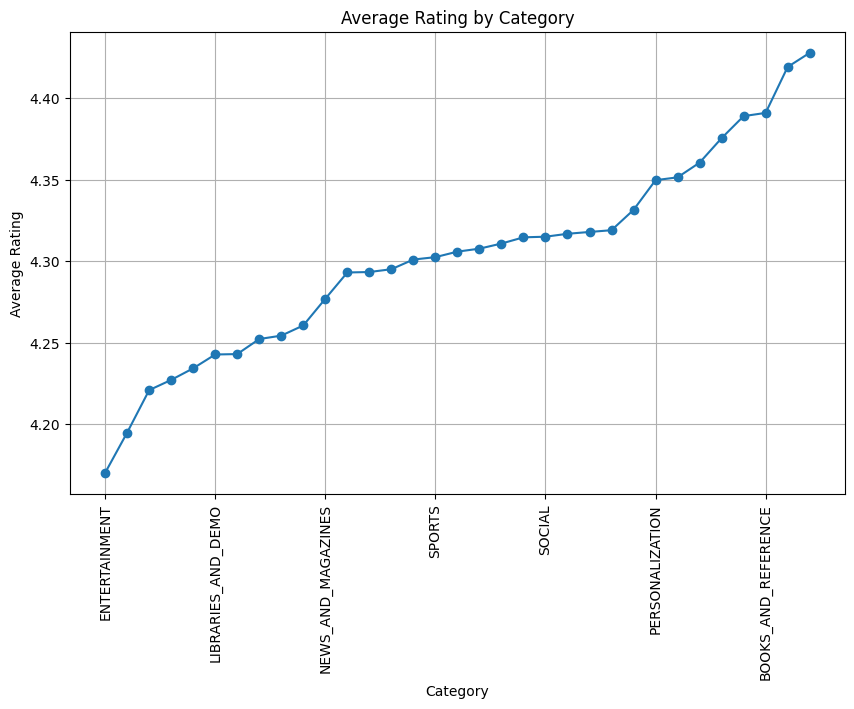

In [ ]:
# Group by 'Category' and calculate the mean rating
category_mean_rating = googleplaystore.groupby('Category')['Rating'].mean().sort_values()

# Line plot
plt.figure(figsize=(10, 6))
category_mean_rating.plot(kind='line', marker='o')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


###2. Area Plot
An area plot can compare multiple quantities over time or categories. Here, we'll show the distribution of the number of reviews across different categories.


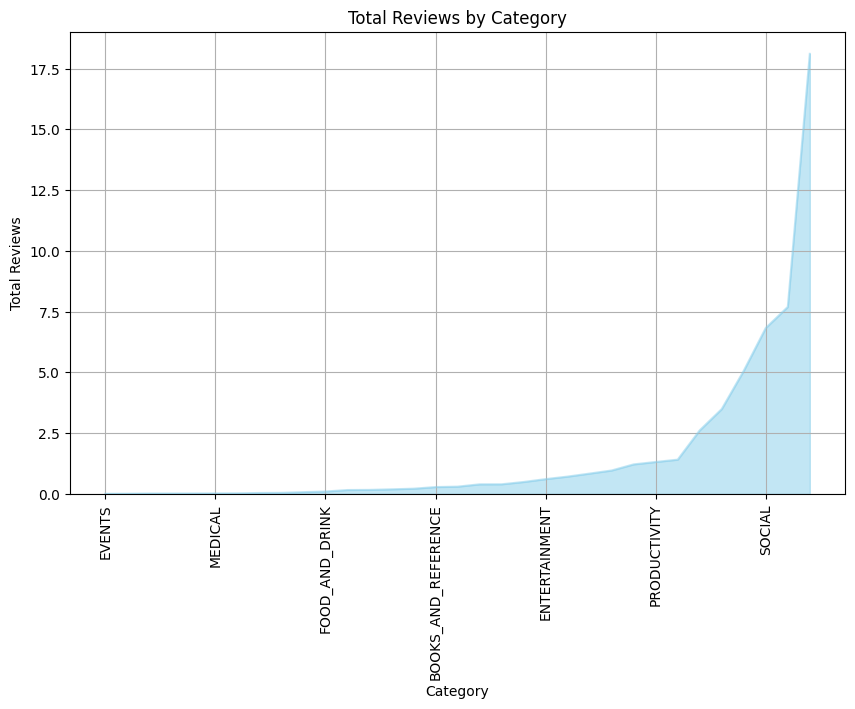

In [ ]:
# Group by 'Category' and sum up the reviews
googleplaystore['Reviews'] = pd.to_numeric(googleplaystore['Reviews'], errors='coerce')

# Drop rows with NaN values in 'Reviews'
googleplaystore = googleplaystore.dropna(subset=['Reviews'])

# Group by 'Category' and sum up the reviews
category_reviews = googleplaystore.groupby('Category')['Reviews'].sum().sort_values()

# Area plot
plt.figure(figsize=(10, 6))
category_reviews.plot(kind='area', color='skyblue', alpha=0.5)
plt.title('Total Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Total Reviews')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


###3. Histogram
A histogram displays the distribution of a numerical variable. We'll create a histogram for the Rating column.


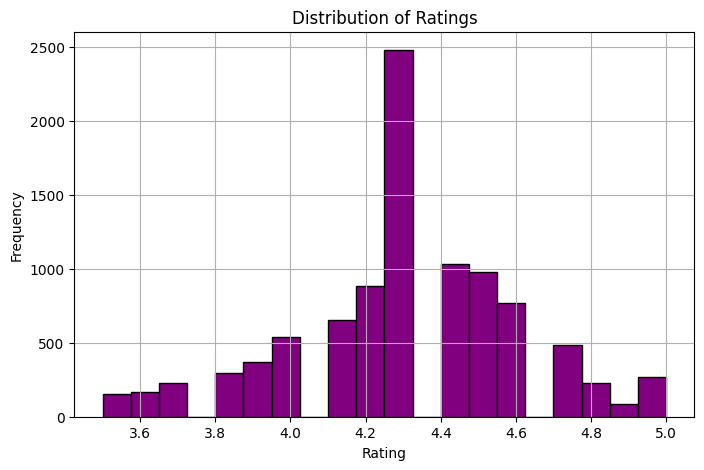

In [ ]:
# Histogram for 'Rating'
plt.figure(figsize=(8, 5))
plt.hist(googleplaystore['Rating'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

###4. Bar Chart
A bar chart can compare the average size of apps in different categories.


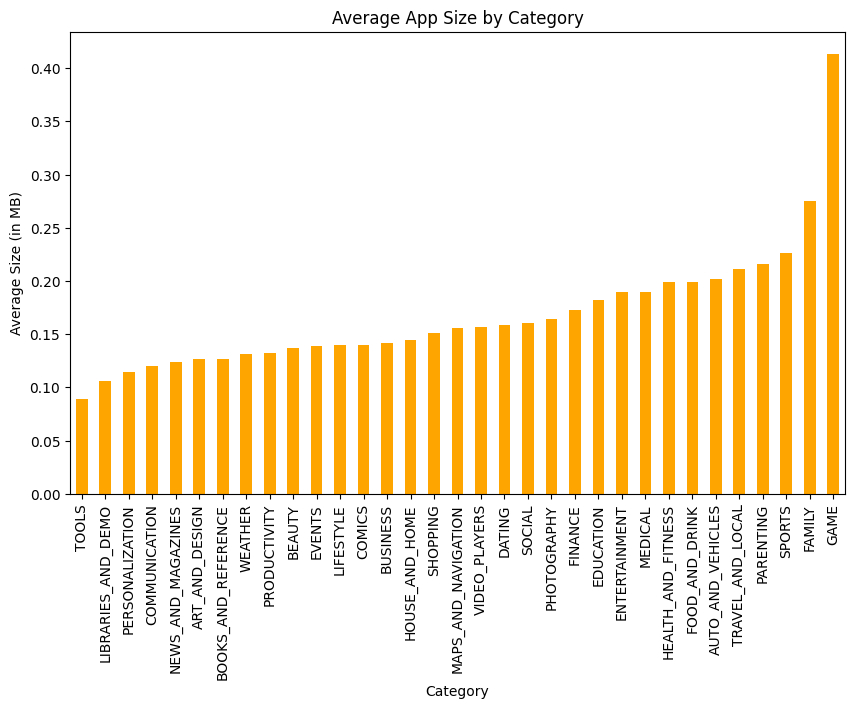

In [ ]:

# Group by 'Category' and calculate the mean size
category_mean_size = googleplaystore.groupby('Category')['Size'].mean().sort_values()

# Bar chart
plt.figure(figsize=(10, 6))
category_mean_size.plot(kind='bar', color='orange')
plt.title('Average App Size by Category')
plt.xlabel('Category')
plt.ylabel('Average Size (in MB)')
plt.xticks(rotation=90)
plt.show()

###5. Pie Chart
A pie chart can show the distribution of app types (Free vs Paid).


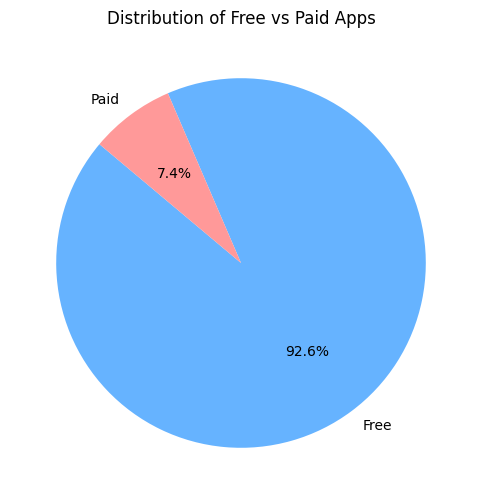

In [ ]:
# Pie chart for 'Type'
type_distribution = googleplaystore['Type'].value_counts()

plt.figure(figsize=(6, 6))
type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Free vs Paid Apps')
plt.ylabel('')  # Remove the y-label
plt.show()

###6. Box Plot
A box plot can visualize the distribution of ratings and detect outliers.


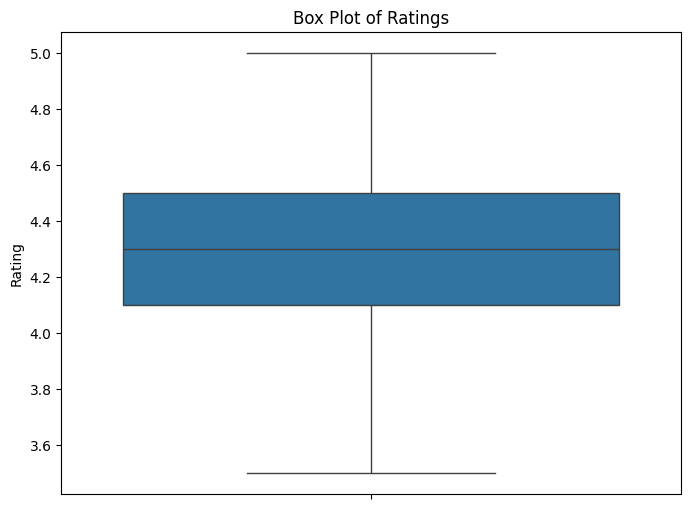

In [ ]:
# Box plot for 'Rating'
plt.figure(figsize=(8, 6))
sns.boxplot(y=googleplaystore['Rating'])
plt.title('Box Plot of Ratings')
plt.ylabel('Rating')
plt.show()

###7. Scatter Plot
A scatter plot can analyze the relationship between the number of reviews and app ratings.


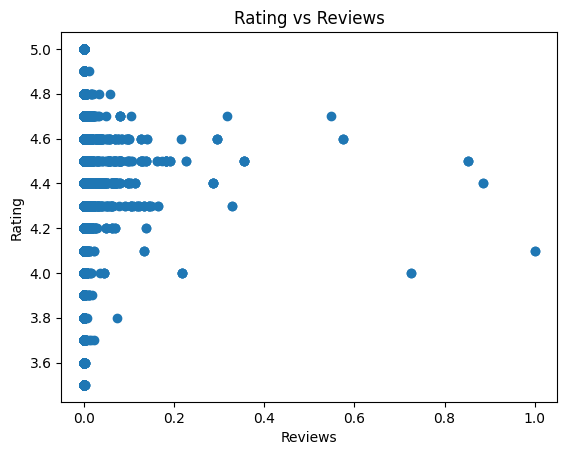

In [ ]:
# Scatter plot of 'Rating' vs 'Reviews'
plt.scatter(googleplaystore['Reviews'], googleplaystore['Rating'])
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Rating vs Reviews')
plt.show()

###8. Bubble Plot
A bubble plot is an enhanced scatter plot that includes a third dimension through the size of the bubbles. Here, we'll visualize the relationship between the number of installs, reviews, and ratings.

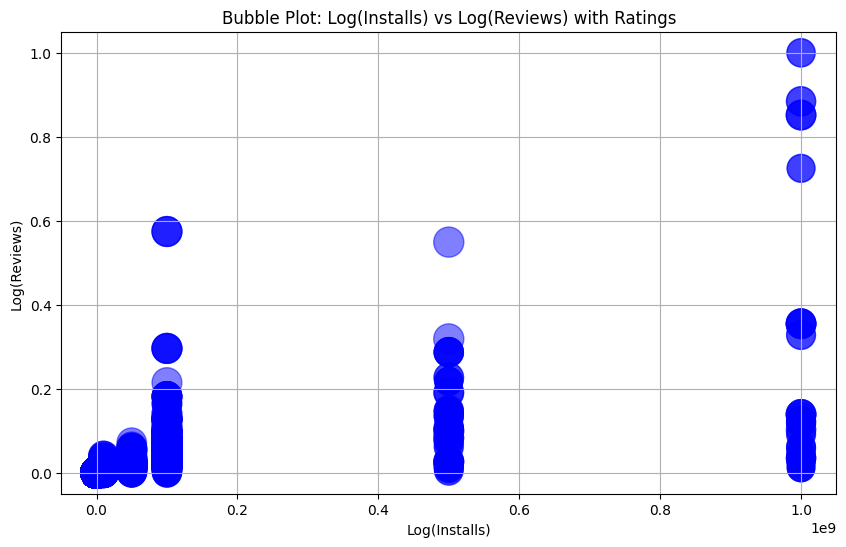

In [ ]:

# Apply log transformation to reduce the scale of 'Installs' and 'Reviews'
installs = googleplaystore['Installs'].replace('+','').replace(',','').astype(float)
reviews = googleplaystore['Reviews'].replace(',','').astype(float)

# Bubble plot for 'Installs' vs 'Reviews' with 'Rating' as bubble size
plt.figure(figsize=(10, 6))
plt.scatter(installs, reviews,
            s=googleplaystore['Rating']*100, alpha=0.5, color='blue')
plt.title('Bubble Plot: Log(Installs) vs Log(Reviews) with Ratings')
plt.xlabel('Log(Installs)')
plt.ylabel('Log(Reviews)')
plt.grid(True)
plt.show()